<a href="https://colab.research.google.com/github/tuanyuan2008/cs4641/blob/master/randomized-optimization/4_peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install mlrose

import mlrose
import numpy as np
import matplotlib.pyplot as plt
import timeit

Four Peaks Problem
=======

In [0]:
fitness = mlrose.FourPeaks(t_pct=0.15)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [3]:
fitness.evaluate(state)

16

Simulated Annealing
-------

In [0]:
# Define decay schedules
schedule = mlrose.GeomDecay()

In [0]:
problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness,
                         maximize = True, max_val = 12)

In [6]:
dic = {}

def tune_schedule(schedule):
  fit_scores = []

  for i in range(50):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 10, max_iters = 1000,
                                                          init_state = state)
    print('Iteration ', str(i))
    print('The best state found is: ', best_state)
    print('The fitness at the best state is: ', best_fitness)
    print('\n')

    fit_scores.append(best_fitness)

  print('The average fitness is '+ str(sum(fit_scores) / 50) + ' for ' + str(schedule) + '.')
  
  return sum(fit_scores) / 50

dic[schedule] = tune_schedule(schedule)

Iteration  0
The best state found is:  [ 1  1  1  1  1 11  6  6  1  0  0  0]
The fitness at the best state is:  17.0


Iteration  1
The best state found is:  [1 1 1 1 1 1 1 1 2 0 0 0]
The fitness at the best state is:  20.0


Iteration  2
The best state found is:  [ 1  1  1  3 11  8  0 11  2  0  0  0]
The fitness at the best state is:  15.0


Iteration  3
The best state found is:  [ 1  1  1 11 11  2 10  2  5  0  0  0]
The fitness at the best state is:  15.0


Iteration  4
The best state found is:  [ 1  1  1  1  1  1  8  5 11  0  0  0]
The fitness at the best state is:  18.0


Iteration  5
The best state found is:  [ 1  1  1  1  1  3 10  9  2  0  0  0]
The fitness at the best state is:  17.0


Iteration  6
The best state found is:  [ 1  1  1  9 11  4  4  0  0  0  0  0]
The fitness at the best state is:  17.0


Iteration  7
The best state found is:  [1 1 1 0 4 9 0 0 0 0 0 0]
The fitness at the best state is:  18.0


Iteration  8
The best state found is:  [ 1  1  1  7 10  7  9  0  0  0  0

In [7]:
schedule = mlrose.ExpDecay()
dic[schedule] = tune_schedule(schedule) 

print('\n')

schedule = mlrose.ArithDecay()
dic[schedule] = tune_schedule(schedule)

Iteration  0
The best state found is:  [1 1 1 2 1 0 0 0 0 0 0 0]
The fitness at the best state is:  19.0


Iteration  1
The best state found is:  [ 1  1  1  1  1  2 11 11  6  0  0  0]
The fitness at the best state is:  17.0


Iteration  2
The best state found is:  [1 1 1 2 1 3 0 0 0 0 0 0]
The fitness at the best state is:  18.0


Iteration  3
The best state found is:  [1 1 1 6 5 6 0 0 0 0 0 0]
The fitness at the best state is:  18.0


Iteration  4
The best state found is:  [ 1  1  1  1  1  6 11  8  1  0  0  0]
The fitness at the best state is:  17.0


Iteration  5
The best state found is:  [ 1  1  1  1  9 11  0  0  0  0  0  0]
The fitness at the best state is:  18.0


Iteration  6
The best state found is:  [1 1 1 5 3 3 3 4 0 0 0 0]
The fitness at the best state is:  16.0


Iteration  7
The best state found is:  [ 1  1  1  8  7 11  2  6  0  0  0  0]
The fitness at the best state is:  16.0


Iteration  8
The best state found is:  [1 1 1 5 8 1 0 0 0 0 0 0]
The fitness at the best state i

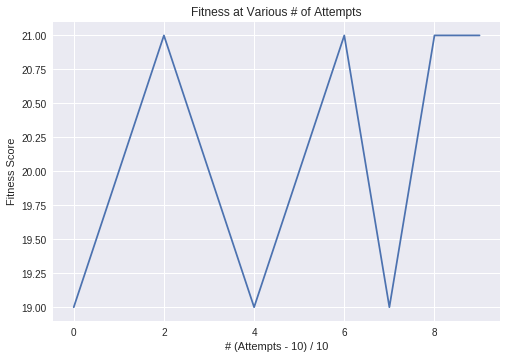

The maximum fitness score of 21.0 is obtained in 30 attempts.


In [8]:
SA_best_schedule = max(dic, key=lambda key: dic[key])

attempts = range(10, 110, 10)

best_score = 0
best_score_index = -1

fit_scores = [0] * len(attempts)

for i, a in enumerate(attempts):
  best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = SA_best_schedule,
                                                        max_attempts = a, max_iters = 1000,
                                                        init_state = state)
#   print('Iteration ', str(i))
#   print('The best state found is: ', best_state)
#   print('The fitness at the best state is: ', best_fitness)
#   print('\n')

  fit_scores[i] = best_fitness

  if best_fitness > best_score:
    best_score = best_fitness
    best_score_index = (i + 1) * 10

plt.plot(fit_scores)

plt.title("Fitness at Various # of Attempts")
plt.xlabel("# (Attempts - 10) / 10")
plt.ylabel("Fitness Score")
plt.show()

print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')

/usr/local/lib/python3.6/dist-packages/mlrose/algorithms.py:241: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


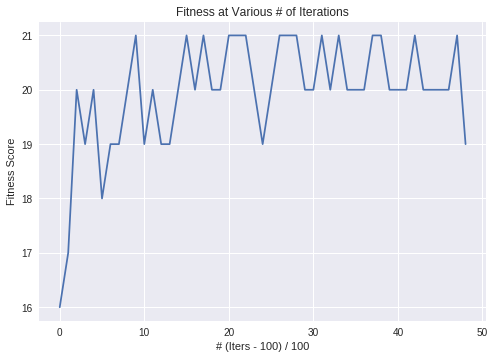

The maximum fitness score of 21.0 is obtained in 1000 iterations.


In [9]:
SA_best_attempt = best_score_index

iters = range(100, 5000, 100)

def SA_iters(iters, best_schedule, best_attempt):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = best_schedule,
                                                          max_attempts = best_attempt, max_iters = a,
                                                          init_state = state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

SA_results = SA_iters(iters, SA_best_schedule, SA_best_attempt)

SA_best_iter = SA_results[0]
  
SA_fit_scores = SA_results[1]

Genetic Algorithms
-----

In [0]:
fitness = mlrose.FourPeaks(t_pct=0.15)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness,
                         maximize = True, max_val = 12)

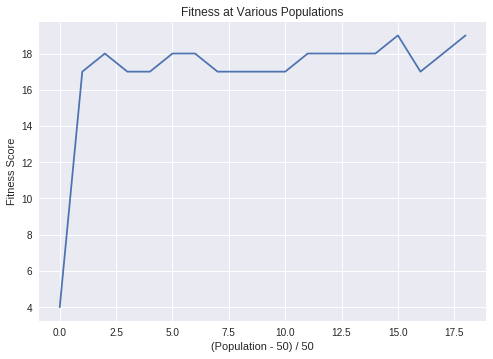

The maximum fitness score of 19.0 is obtained with population 800.


In [11]:
pop = range(50, 1000, 50)

def tune_pop(pop):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(pop)

  for i, a in enumerate(pop):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=a, mutation_prob=0.1, max_attempts=10, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 50

  plt.plot(fit_scores)

  plt.title("Fitness at Various Populations")
  plt.xlabel("(Population - 50) / 50")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with population ' + str(best_score_index) + '.')
  
  return best_score_index

optimal_pop = tune_pop(pop)

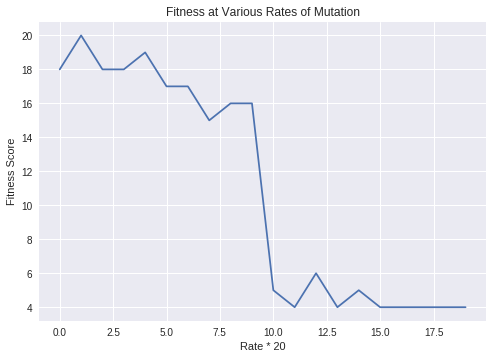

The maximum fitness score of 20.0 is obtained with mutation rate 0.05.


In [12]:
def tune_rate(optimal_pop):
  rate = 0.01
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * 20

  for i in range(20):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=rate, max_attempts=10, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 0.05
      
    rate += 0.05

  plt.plot(fit_scores)

  plt.title("Fitness at Various Rates of Mutation")
  plt.xlabel("Rate * 20")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with mutation rate ' + str(best_score_index) + '.')
  
  return best_score_index

optimal_rate = tune_rate(optimal_pop)

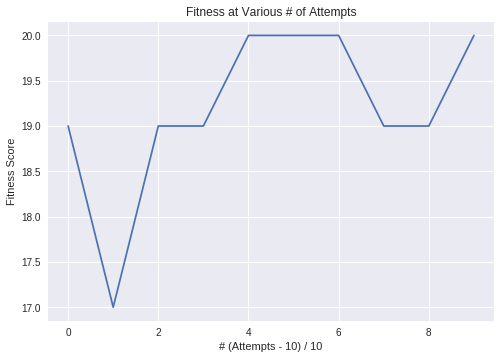

The maximum fitness score of 20.0 is obtained in 50 attempts.


In [13]:
def GA_tune_attempts(optimal_pop, optimal_rate):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=optimal_rate, max_attempts=a, max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
  return best_score_index

optimal_attempt = GA_tune_attempts(optimal_pop, optimal_rate)

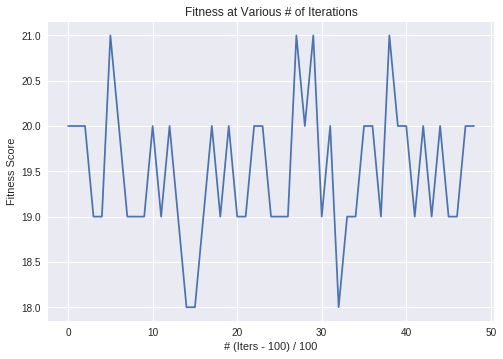

The maximum fitness score of 21.0 is obtained in 600 iterations.


In [14]:
def GA_iters(optimal_pop, optimal_rate, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=optimal_pop, mutation_prob=optimal_rate, max_attempts=optimal_attempt, max_iters=a)

  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

GA_best_iter, GA_fit_scores = GA_iters(optimal_pop, optimal_rate, optimal_attempt)

MIMIC
-----

In [0]:
fitness = mlrose.FourPeaks(t_pct=0.15)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness,
                         maximize = True, max_val = 12)

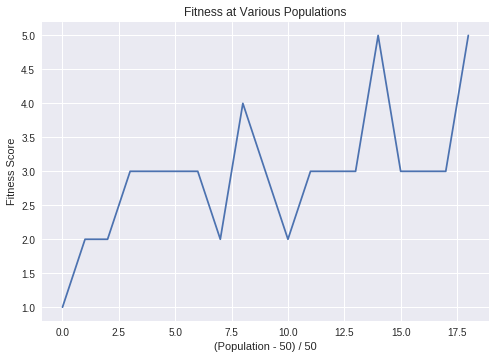

The maximum fitness score of 5.0 is obtained with population 750.


In [17]:
pop = range(50, 1000, 50)

def MIMIC_tune_pop(pop):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(pop)

  for i, a in enumerate(pop):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=a, keep_pct=0.2, max_attempts=10,
          max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 50

  plt.plot(fit_scores)

  plt.title("Fitness at Various Populations")
  plt.xlabel("(Population - 50) / 50")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with population ' + str(best_score_index) + '.')
  
  return best_score_index

MIMIC_optimal_pop = MIMIC_tune_pop(pop)

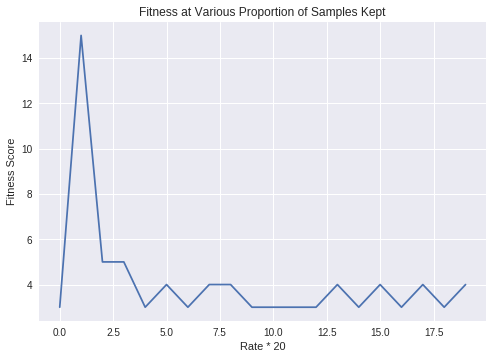

The maximum fitness score of 15.0 is obtained with 0.05 proportion samples kept.


In [18]:
def MIMIC_tune_rate(optimal_pop):
  rate = 0.01
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * 20

  for i in range(20):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=rate, max_attempts=10,
          max_iters=np.inf)
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 0.05
      
    rate += 0.05

  plt.plot(fit_scores)

  plt.title("Fitness at Various Proportion of Samples Kept")
  plt.xlabel("Rate * 20")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with ' + str(best_score_index) + ' proportion samples kept.')
  
  
  return best_score_index

MIMIC_optimal_rate = MIMIC_tune_rate(MIMIC_optimal_pop)

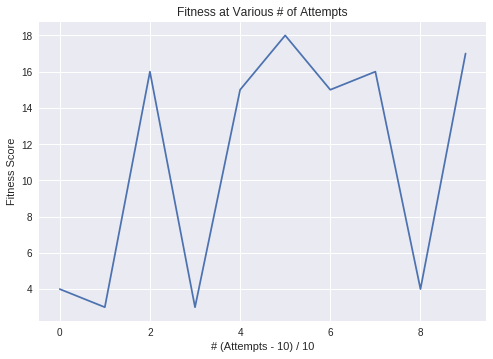

The maximum fitness score of 18.0 is obtained in 60 attempts.


In [19]:
def MIMIC_tune_attempts(optimal_pop, optimal_rate):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=optimal_rate, max_attempts=a,
          max_iters=np.inf)  
    
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
    
  return best_score_index

MIMIC_optimal_attempt = MIMIC_tune_attempts(MIMIC_optimal_pop, MIMIC_optimal_rate)

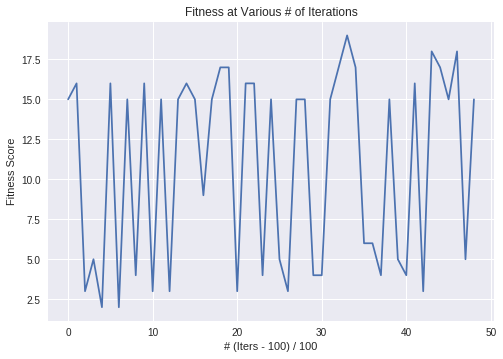

The maximum fitness score of 19.0 is obtained in 3400 iterations.


In [20]:
def MIMIC_iters(optimal_pop, optimal_rate, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.mimic(problem, pop_size=optimal_pop, keep_pct=optimal_rate, max_attempts=optimal_attempt,
          max_iters=a) 
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
  
  return best_score_index, fit_scores

MIMIC_best_iter, MIMIC_fit_scores = MIMIC_iters(MIMIC_optimal_pop, MIMIC_optimal_rate, MIMIC_optimal_attempt)

Randomized Hill Climbing
-----

In [0]:
fitness = mlrose.FourPeaks(t_pct=0.15)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness,
                         maximize = True, max_val = 12)

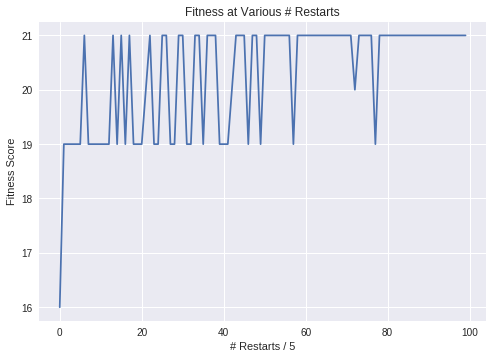

The maximum fitness score of 21.0 is obtained with 30 restarts.


In [22]:
restarts = range(0, 500, 5)

def tune_restarts(restarts):
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(restarts)

  for i, a in enumerate(restarts):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=10, max_iters=np.inf, restarts=a,
                      init_state=state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = i * 5

  plt.plot(fit_scores)

  plt.title("Fitness at Various # Restarts")
  plt.xlabel("# Restarts / 5")
  plt.ylabel("Fitness Score")
  plt.show()
    
  print('The maximum fitness score of ' + str(best_score) + ' is obtained with ' + str(best_score_index) + ' restarts.')
  
  return best_score_index

optimal_restarts = tune_restarts(restarts)

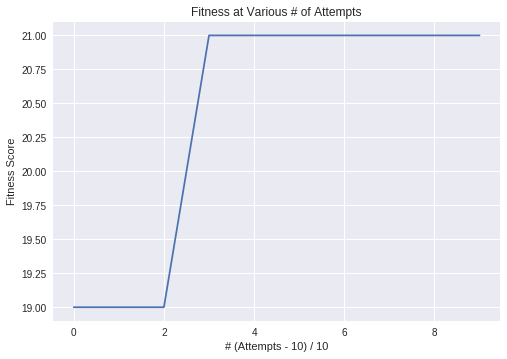

The maximum fitness score of 21.0 is obtained in 40 attempts.


In [23]:
def RHC_tune_attempts(optimal_restarts):

  attempts = range(10, 110, 10)
  
  best_score = 0
  best_score_index = -1
  
  fit_scores = [0] * len(attempts)

  for i, a in enumerate(attempts):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=a, max_iters=np.inf, restarts=optimal_restarts,
                      init_state=state)
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')
  
    fit_scores[i] = best_fitness

    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 10

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Attempts")
  plt.xlabel("# (Attempts - 10) / 10")
  plt.ylabel("Fitness Score")
  plt.show()

  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' attempts.')
  
  return best_score_index

RHC_optimal_attempt = RHC_tune_attempts(optimal_restarts)

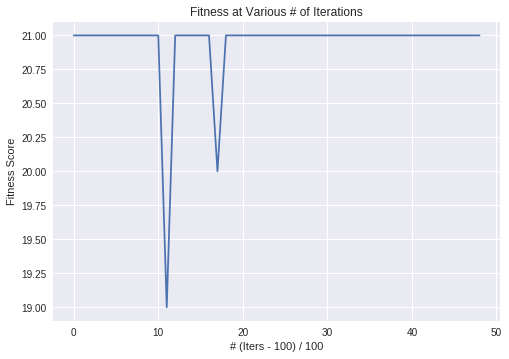

The maximum fitness score of 21.0 is obtained in 100 iterations.


In [24]:
def RHC_iters(optimal_restarts, optimal_attempt):
  best_score = 0
  best_score_index = -1
  
  iters = range(100, 5000, 100)
  
  fit_scores = [0] * len(iters)

  for i, a in enumerate(iters):
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=optimal_attempt, max_iters=a, restarts=optimal_restarts,
                      init_state=state) 
  #   print('Iteration ', str(i))
  #   print('The best state found is: ', best_state)
  #   print('The fitness at the best state is: ', best_fitness)
  #   print('\n')

    fit_scores[i] = best_fitness
    
    if best_fitness > best_score:
      best_score = best_fitness
      best_score_index = (i + 1) * 100

  plt.plot(fit_scores)

  plt.title("Fitness at Various # of Iterations")
  plt.xlabel("# (Iters - 100) / 100")
  plt.ylabel("Fitness Score")
  plt.show()
  
  print('The maximum fitness score of ' + str(best_score) + ' is obtained in ' + str(best_score_index) + ' iterations.')
    
  return best_score_index, fit_scores

RHC_best_iter, RHC_fit_scores = RHC_iters(optimal_restarts, RHC_optimal_attempt)